# Predicting Flight Ticket Price

### Problem Statement

As you all know, flight ticket prices can be something hard to guess. Today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. Data is downloaded from https://www.machinehack.com/hackathons/predict_the_flight_ticket_price_hackathon/overview    

Size of training set: 10683 <br> 
Size of test set: 2671 <br>
<b>FEATURES:</b><br/>
<b>Airline:</b> The name of the airline.<br/> 
<b>Date_of_Journey:</b> The date of the journey <br/>
<b>Source:</b> The source from which the service begins.<br/>
<b>Destination:</b> The destination where the service ends. <br/>
<b>Route:</b> The route taken by the flight to reach the destination.<br/>
<b>Dep_Time:</b> The time when the journey starts from the source.<br/>
<b>Arrival_Time:</b> Time of arrival at the destination.<br/>
<b>Duration:</b> Total duration of the flight.<br/>
<b>Total_Stops:</b> Total stops between the source and destination. <br/>
<b>Additional_Info:</b> Additional information about the flight Price: The price of the ticket

### Motivation
I bet that everyone is wondering about next vacation - how to spend your money. My family is always having conversation on when and where our next vacation should be. we may have different ideas about where to go for family vacatiion, we all have agreed that ticket price will outrageouly expensive to recover their financial loss from this hibernating period in covid-19. My curiosity of flight ticket price lead me to work on this project to find out what the price would be when we will no longer have to worry about covid-19 and travel restriction is no longer imposed at everywhere. Of course, ticket price prediction may not make sense if you are ouside India although I hope that you may have appreciation on how powerful machine learning models are to perform such a task.

### Libraries used in the project
1. Jupyter
2. Pandas
3. Numpy
4. Seaborn
5. Sklearn
6. XGboost
7. Random Forest
8. Ensembling Models

### Sections
Following topics will be explored and investigated. 
1. Import Libraries and Load Data
2. Feature Engineering and Data Cleansing
3. Data Exploration
4. Model Building and Tuning
5. Prediction with Test Data
6. Export Model for web application use


Without further due, let's dive into actual work,

# 1. Import Libraries and Load Data

In [359]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter(action='ignore')#to hide annoying warning message for outdated library methods

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

import json
#import visuals as vs

#Use this code to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

##### Load Data
Pandas is used to load data from excel sheet. Let's find out what data looks like. Train dataset will be named as 'a' while Test dataset will be 'b'. Later, we will combine these two datasets to do feature engineering. 

As you can see, train data has Price and test dataset doesn't have Price, which is target variable that we will be predicting. Train dataset has 10683 observations which consist of indepdendent 10 features and 1 dependant variable - Price, and Test dataset has 2671 observation with 10 independent features. 

In [291]:
a = pd.read_excel('Data_Train.xlsx')
b = pd.read_excel('Test_Set.xlsx')

c = a.append(b)# merge a and b for feature engineering in later section

In [292]:
a.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [293]:
a.shape

(10683, 11)

In [294]:
b.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [295]:
b.shape

(2671, 10)

In [296]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# 2. Feature Enginering and Data Cleansing
Data exploration is usualy the first step that data scientis will perform in typical project. However, all 10 features in the dataset are object type and only Price feature is numerical. Thus, instead of performing exploratory data analysis, we will start with feature engineering such as label encoding, creating new data points from existing features, removing treated features from dataset, and formatting date into day, month, and year, etc. 


In [297]:
c.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [298]:
c.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


Let's start with Total_Stops feature and check if there is any missing value.

In [299]:
# check if any missing record is in
c[c['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [300]:
# Only one observation has missing Total_Stops value comparing to other similar observation, 
# the record should be updated as 1 stop
c['Total_Stops'] = c['Total_Stops'].fillna('1 stop')

In [301]:
#verify if missing value has been fill in
c[c['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [302]:
#count total unique stops
c['Total_Stops'].value_counts()

1 stop      7057
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [303]:
#convert non-stop to 0 stop since it is no stopping
#split data with white space and get 1st index as number and create a new column called Stops
#convert new column Stops at interger  
c['Total_Stops'] = c['Total_Stops'].replace('non-stop', '0 stop')
c['Stops'] = c['Total_Stops'].str.split(' ').str[0]
c['Stops'] = c['Stops'].astype(int)

In [304]:
c['Stops'].value_counts()

1    7057
0    4340
2    1899
3      56
4       2
Name: Stops, dtype: int64

Now, start working on Route feature. Data won't make sense unless we split them by using → delimilter. Individual route value is much easier to do label encoding.

In [305]:
#split using delimter → on Route and create new features
c['Route_1'] = c['Route'].str.split('→ ').str[0]
c['Route_2'] = c['Route'].str.split('→ ').str[1]
c['Route_3'] = c['Route'].str.split('→ ').str[2]
c['Route_4'] = c['Route'].str.split('→ ').str[3]
c['Route_5'] = c['Route'].str.split('→ ').str[4]

In [306]:
#there is white space included while splitting and creating new features. 
#Any columns from Route_1 to Route_5 should have only 3 characters. Let's check.
len(c.iloc[110]['Route_1'])

4

In [307]:
#remove white space
c['Route_1'] = c['Route_1'].str.strip()
c['Route_2'] = c['Route_2'].str.strip()
c['Route_3'] = c['Route_3'].str.strip()
c['Route_4'] = c['Route_4'].str.strip()
c['Route_5'] = c['Route_5'].str.strip()

#fill in "None" value in empty cells
c['Route_1'].fillna("None",inplace=True)
c['Route_2'].fillna("None",inplace=True)
c['Route_3'].fillna("None",inplace=True)
c['Route_4'].fillna("None",inplace=True)
c['Route_5'].fillna("None",inplace=True)

In [308]:
#verify extra space is removed
len(c.iloc[0]['Route_1'])

3

Now, let's work on Date_of_Journey and split them into Day, Month and Year by using delimter '/'. And, also convert new colums into integer.

In [309]:
c['Journey_Day'] = c['Date_of_Journey'].str.split('/').str[0]
c['Journey_Day'] = c['Journey_Day'].astype(int)

c['Journey_Month'] = c['Date_of_Journey'].str.split('/').str[1]
c['Journey_Month'] = c['Journey_Month'].astype(int)

c['Journey_Year'] = c['Date_of_Journey'].str.split('/').str[2]
c['Journey_Year'] = c['Journey_Year'].astype(int)

Let's do the same things on Dept_Time, Arrial_Time, Duration.

In [310]:
c['Departure_Hour'] = c['Dep_Time'].str.split(':').str[0]
c['Departure_Hour'] = c['Departure_Hour'].astype(int)

c['Departure_Min'] = c['Dep_Time'].str.split(':').str[1]
c['Departure_Min'] = c['Departure_Min'].astype(int)

c['Arrival_Hour'] = c['Arrival_Time'].str[0:2]
c['Arrival_Hour'] = c['Arrival_Hour'].astype(int)

c['Arrival_Min'] = c['Arrival_Time'].str[3:5]
c['Arrival_Min'] = c['Arrival_Min'].astype(int)

c['Duration_Hour']  = c['Duration'].str.split(' ').str[0]
c['Duration_Min']  = c['Duration'].str.split(' ').str[1]

c['Duration_Hour']  = c['Duration_Hour'].str.split('h').str[0]
c['Duration_Min']  = c['Duration_Min'].str.split('m').str[0]
c['Duration_Hour'] = c['Duration_Hour'].fillna(0)
c['Duration_Min'] = c['Duration_Min'].fillna(0)

c['Duration_Hour'] = c['Duration_Hour'].replace('5m', '50')
c['Duration_Hour'] = c['Duration_Hour'].astype(int)
c['Duration_Min'] = c['Duration_Min'].astype(int)

In [311]:
#drop origianl columns since we get new features dervied from them.
c.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops'],
       inplace=True, axis=1)

In [312]:
#a quick look on dataset with new features
c.head()

,Airline,Source,Destination,Route,Additional_Info,Price,Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897.0,0,BLR,DEL,None,None,None,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662.0,2,CCU,IXR,BBI,BLR,None,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882.0,2,DEL,LKO,BOM,COK,None,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218.0,1,CCU,NAG,BLR,None,None,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302.0,1,BLR,NAG,DEL,None,None,1,3,2019,16,50,21,35,4,45


In [313]:
print(c['Additional_Info'].value_counts())

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
2 Long layover                      1
1 Short layover                     1
Red-eye flight                      1
Name: Additional_Info, dtype: int64


In [314]:
#Make No info and No Info same
c['Additional_Info'] = c['Additional_Info'].replace('No Info','No info' )

Before moving on to another section, let's quickly check on "Price" target vairable if there is empty values. 
Note that checking should be dataset 'a', not at 'c' because c is combination of both dataset 'a' and 'b', which "Price" is empty. 

In [315]:
a[a['Price'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


Let's create a json dictionary for Source and Destination. Individual label encoding will create different number assigned to same value . e.g. Mumbai could be '1' in Source while assign '3' in Destination. By doing so will be helpful when building Flask web application for model prediction.  

In [316]:
# generate unique dicdtionary for Source and Destination Airports and apply a sequential number so that 
# when using with web application, those values can be assigned.
lsSource = []
for s in c['Source']:
    lsSource.append(s)

In [317]:
lsDestination = []
for s in c['Destination']:
    lsDestination.append(s)

In [318]:
#merge two lists - source + destination
lsSource.extend(lsDestination)

In [319]:
#set to unique and convert to list
lsSource = list(set(lsSource))

In [320]:
keySource = []
for k in range(len(lsSource)):
    keySource.append(k + 1)

In [321]:
dictSource = dict(zip(lsSource, [k + 1 for k in range(len(lsSource))]))
dictSource

{'Hyderabad': 1,
 'Banglore': 2,
 'Delhi': 3,
 'Chennai': 4,
 'Kolkata': 5,
 'Cochin': 6,
 'New Delhi': 7,
 'Mumbai': 8}

In [322]:
#create common function to be used for generating json files
def create_json_list(dictionaryData):
    jsonList = []
    for key, value in dictionaryData.items():#.iteritems():
        tempDict = dict()
        tempDict['name'] = key
        tempDict['code'] = value
    #temp = [key,value]
        jsonList.append(tempDict)
    return jsonList

In [323]:
locationList = create_json_list(dictSource)
locationList

[{'name': 'Hyderabad', 'code': 1},
 {'name': 'Banglore', 'code': 2},
 {'name': 'Delhi', 'code': 3},
 {'name': 'Chennai', 'code': 4},
 {'name': 'Kolkata', 'code': 5},
 {'name': 'Cochin', 'code': 6},
 {'name': 'New Delhi', 'code': 7},
 {'name': 'Mumbai', 'code': 8}]

In [324]:
#generate json file for location
with open('locations.json', 'w') as f:
    json.dump(locationList, f)

In [325]:
#c['Route'].str.split('→ ')

In [326]:
c[c['Route'].isnull()]
c['Route'] = c['Route'].fillna(value='DEL→ BOM→ COK')

In [327]:
# generate unique dicdtionary for Routes and apply a sequential number so that 
# when using with web application, those values can be assigned.
lsRoute = []
for r in c['Route'].str.split('→ '):
    #print(r)
    for loc in r:
        #print(loc)
        lsRoute.append(str(loc.strip()))

lsRoute = list(set(lsRoute))
print(type(lsRoute))
print(lsRoute)

<class 'list'>
['GWL', 'LKO', 'DED', 'GOI', 'BDQ', 'VTZ', 'GAU', 'BHO', 'RPR', 'COK', 'UDR', 'IDR', 'IXB', 'IXA', 'TIR', 'VNS', 'JLR', 'BBI', 'ATQ', 'ISK', 'JDH', 'IXC', 'AMD', 'TRV', 'BLR', 'KNU', 'DEL', 'BOM', 'NDC', 'PAT', 'IMF', 'IXZ', 'HYD', 'STV', 'NAG', 'IXR', 'PNQ', 'IXU', 'HBX', 'JAI', 'VGA', 'CCU', 'MAA']


In [328]:
keyRoute = []
for k in range(len(lsRoute)):
    keyRoute.append(k + 1)

In [329]:
dictRoute = dict(zip(lsRoute, [k + 1 for k in range(len(lsRoute))]))

In [330]:
#dictRoute.update({'None': 0})
dictRoute['None'] =  0
print(dictRoute)

{'GWL': 1, 'LKO': 2, 'DED': 3, 'GOI': 4, 'BDQ': 5, 'VTZ': 6, 'GAU': 7, 'BHO': 8, 'RPR': 9, 'COK': 10, 'UDR': 11, 'IDR': 12, 'IXB': 13, 'IXA': 14, 'TIR': 15, 'VNS': 16, 'JLR': 17, 'BBI': 18, 'ATQ': 19, 'ISK': 20, 'JDH': 21, 'IXC': 22, 'AMD': 23, 'TRV': 24, 'BLR': 25, 'KNU': 26, 'DEL': 27, 'BOM': 28, 'NDC': 29, 'PAT': 30, 'IMF': 31, 'IXZ': 32, 'HYD': 33, 'STV': 34, 'NAG': 35, 'IXR': 36, 'PNQ': 37, 'IXU': 38, 'HBX': 39, 'JAI': 40, 'VGA': 41, 'CCU': 42, 'MAA': 43, 'None': 0}


In [331]:
routeList = create_json_list(dictRoute)

In [332]:
with open('routes.json', 'w') as f:
    json.dump(routeList, f)

In [333]:
convert_to_num = { "Source":     dictSource,
                    "Destination": dictSource,
                   "Route_1": dictRoute,
                   "Route_2": dictRoute,
                   "Route_3": dictRoute,
                   "Route_4": dictRoute,
                   "Route_5": dictRoute}

In [334]:
#verifying Route columns should not have white space
len(c.iloc[0]['Route_1'])

3

In [335]:
#apply 
c.replace(convert_to_num, inplace=True)
c.head()

,Airline,Source,Destination,Route,Additional_Info,Price,Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,IndiGo,2,7,BLR → DEL,No info,3897.0,0,25,27,0,0,0,24,3,2019,22,20,1,10,2,50
1,Air India,5,2,CCU → IXR → BBI → BLR,No info,7662.0,2,42,36,18,25,0,1,5,2019,5,50,13,15,7,25
2,Jet Airways,3,6,DEL → LKO → BOM → COK,No info,13882.0,2,27,2,28,10,0,9,6,2019,9,25,4,25,19,0
3,IndiGo,5,2,CCU → NAG → BLR,No info,6218.0,1,42,35,25,0,0,12,5,2019,18,5,23,30,5,25
4,IndiGo,2,7,BLR → NAG → DEL,No info,13302.0,1,25,35,27,0,0,1,3,2019,16,50,21,35,4,45


In [336]:
le = LabelEncoder()
c['Airline'] = le.fit_transform(c['Airline'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Air Asia': 0, 'Air India': 1, 'GoAir': 2, 'IndiGo': 3, 'Jet Airways': 4, 'Jet Airways Business': 5, 'Multiple carriers': 6, 'Multiple carriers Premium economy': 7, 'SpiceJet': 8, 'Trujet': 9, 'Vistara': 10, 'Vistara Premium economy': 11}


In [337]:
airlineList = create_json_list(le_name_mapping)
airlineList

[{'name': 'Air Asia', 'code': 0},
 {'name': 'Air India', 'code': 1},
 {'name': 'GoAir', 'code': 2},
 {'name': 'IndiGo', 'code': 3},
 {'name': 'Jet Airways', 'code': 4},
 {'name': 'Jet Airways Business', 'code': 5},
 {'name': 'Multiple carriers', 'code': 6},
 {'name': 'Multiple carriers Premium economy', 'code': 7},
 {'name': 'SpiceJet', 'code': 8},
 {'name': 'Trujet', 'code': 9},
 {'name': 'Vistara', 'code': 10},
 {'name': 'Vistara Premium economy', 'code': 11}]

In [338]:
c['Additional_Info'] = le.fit_transform(c['Additional_Info'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'1 Long layover': 0, '1 Short layover': 1, '2 Long layover': 2, 'Business class': 3, 'Change airports': 4, 'In-flight meal not included': 5, 'No check-in baggage included': 6, 'No info': 7, 'Red-eye flight': 8}


In [339]:
additionalInfoList = create_json_list(le_name_mapping)
additionalInfoList

[{'name': '1 Long layover', 'code': 0},
 {'name': '1 Short layover', 'code': 1},
 {'name': '2 Long layover', 'code': 2},
 {'name': 'Business class', 'code': 3},
 {'name': 'Change airports', 'code': 4},
 {'name': 'In-flight meal not included', 'code': 5},
 {'name': 'No check-in baggage included', 'code': 6},
 {'name': 'No info', 'code': 7},
 {'name': 'Red-eye flight', 'code': 8}]

In [340]:
list(le.classes_)

['1 Long layover',
 '1 Short layover',
 '2 Long layover',
 'Business class',
 'Change airports',
 'In-flight meal not included',
 'No check-in baggage included',
 'No info',
 'Red-eye flight']

In [341]:
c.drop(['Route'], inplace = True, axis=1)
c.head()

,Airline,Source,Destination,Additional_Info,Price,Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,3,2,7,7,3897.0,0,25,27,0,0,0,24,3,2019,22,20,1,10,2,50
1,1,5,2,7,7662.0,2,42,36,18,25,0,1,5,2019,5,50,13,15,7,25
2,4,3,6,7,13882.0,2,27,2,28,10,0,9,6,2019,9,25,4,25,19,0
3,3,5,2,7,6218.0,1,42,35,25,0,0,12,5,2019,18,5,23,30,5,25
4,3,2,7,7,13302.0,1,25,35,27,0,0,1,3,2019,16,50,21,35,4,45


In [342]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  int32  
 1   Source           13354 non-null  int64  
 2   Destination      13354 non-null  int64  
 3   Additional_Info  13354 non-null  int32  
 4   Price            10683 non-null  float64
 5   Stops            13354 non-null  int32  
 6   Route_1          13354 non-null  int64  
 7   Route_2          13354 non-null  int64  
 8   Route_3          13354 non-null  int64  
 9   Route_4          13354 non-null  int64  
 10  Route_5          13354 non-null  int64  
 11  Journey_Day      13354 non-null  int32  
 12  Journey_Month    13354 non-null  int32  
 13  Journey_Year     13354 non-null  int32  
 14  Departure_Hour   13354 non-null  int32  
 15  Departure_Min    13354 non-null  int32  
 16  Arrival_Hour     13354 non-null  int32  
 17  Arrival_Min  

# 3. Data Exploration

In [343]:
#split 'c' dataset into Trian and Test. 
Train = c[0:10683]
Test = c[10683:]

Let's take a look at how data is represented. Correlation among features and price. 

In [344]:
#train_categ = Train.select_dtypes(include='object')
train_numer = Train.select_dtypes(exclude='object')

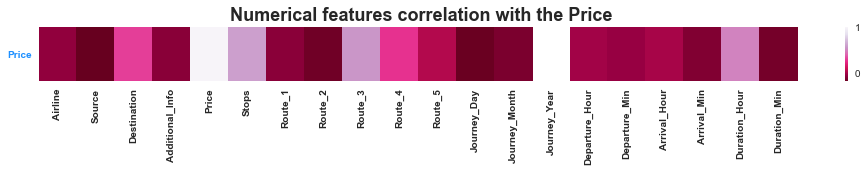

In [345]:
numcorr = train_numer.corr()
f,ax=plt.subplots(figsize=(17,1))

sns.heatmap(numcorr.sort_values(by=['Price'], ascending=False).head(1), cmap='PuRd_r')
plt.title(" Numerical features correlation with the Price", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

As expected, Journey_Year is not relevant because data collected is within a single year 2019 for a few monnths There is a strong corrlation among many features with dark color red/pink.  

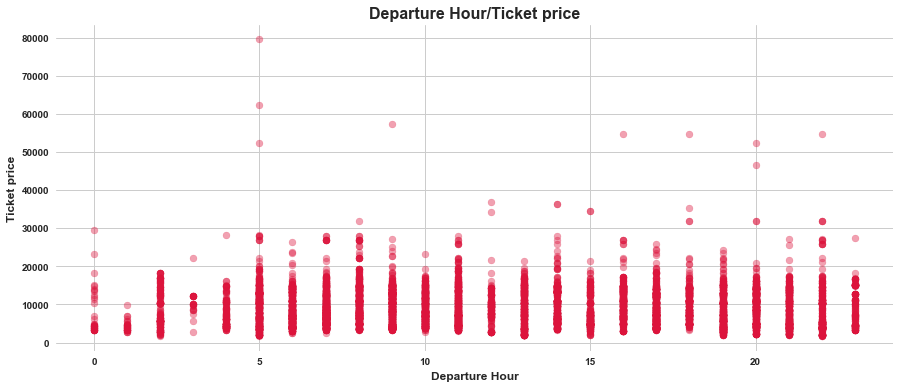

In [346]:
plt.figure(figsize=(15,6))
plt.scatter(x=Train['Departure_Hour'], y=Train['Price'], color='crimson', alpha=0.4)
plt.title('Departure Hour/Ticket price', weight='bold', fontsize=16)
plt.xlabel('Departure Hour', weight='bold', fontsize=12)
plt.ylabel('Ticket price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

In [347]:
#airlineList
airLines = []
airline_count =Train['Airline'].value_counts().sort_values(ascending=False).reset_index()
for i in airline_count['index']:
    airLines.append(airlineList[i]['name'])

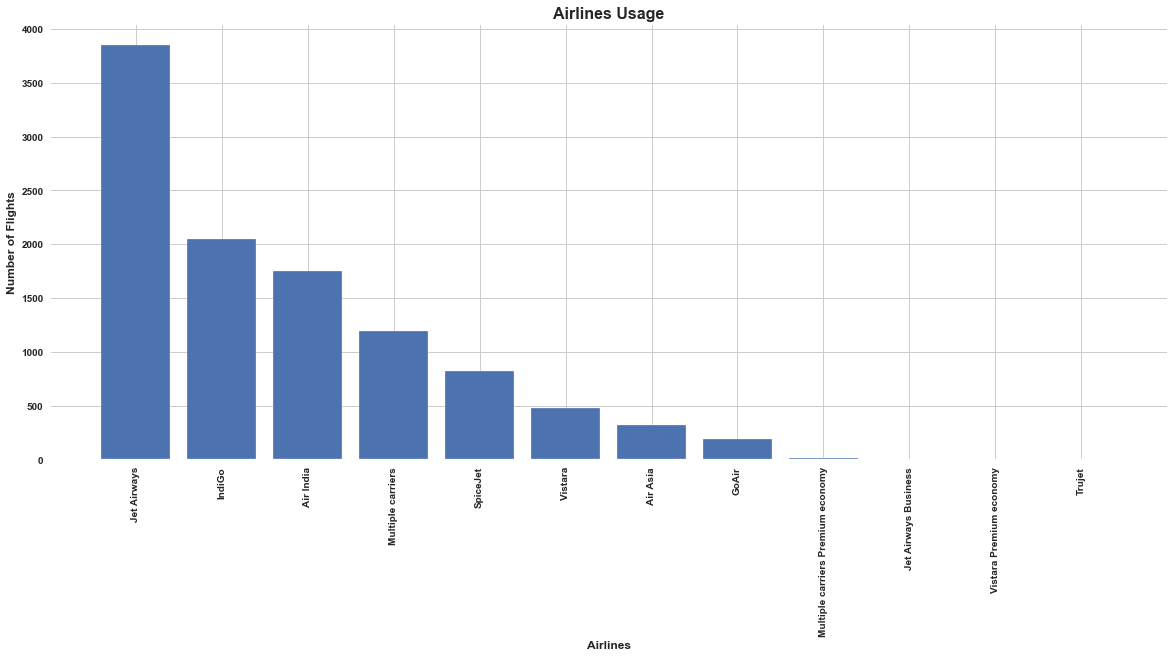

In [348]:
plt.figure(figsize=(20,8))
plt.bar(airLines, airline_count['Airline'])
plt.title('Airlines Usage', weight='bold', fontsize=16)
plt.xlabel('Airlines', weight='bold', fontsize=12)
plt.ylabel('Number of Flights', weight='bold', fontsize=12)
plt.xticks(weight='bold', rotation='vertical')
plt.yticks(weight='bold')
plt.show()

Jet Airways is clearly domainating carrier in airline industry with almost 4000 tickets sold between March and June. Now, let's turn into anomly detection of Price. 

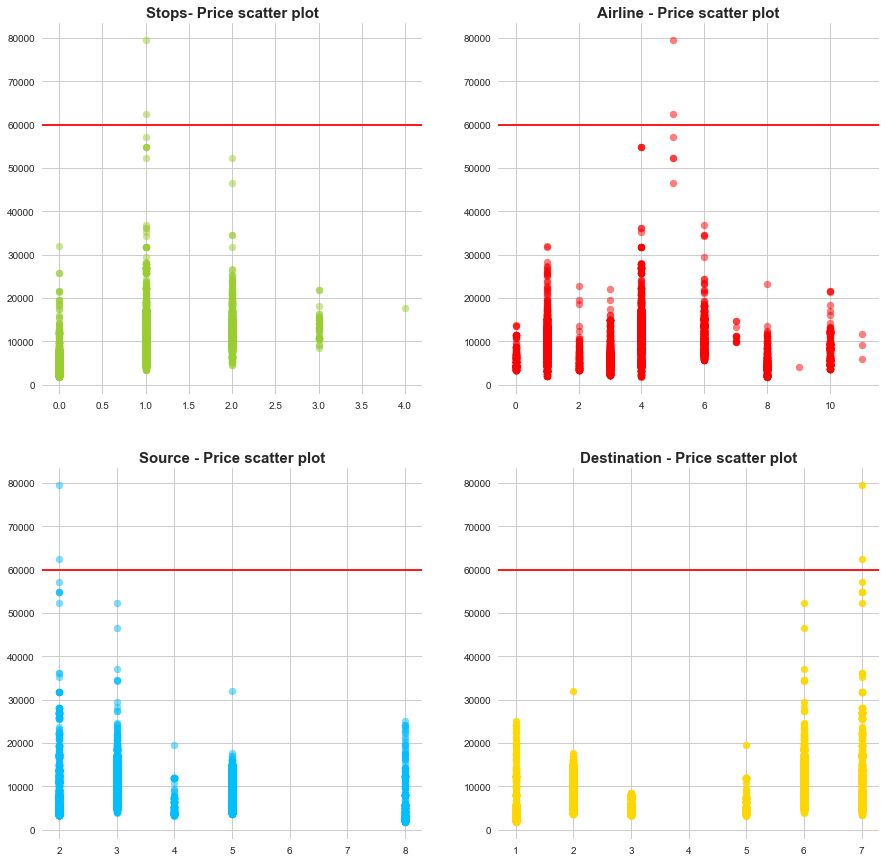

In [349]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((2,2),(0,0))
plt.scatter(x=Train['Stops'], y=Train['Price'], color=('yellowgreen'), alpha=0.5)
plt.axhline(y=60000, color='r', linestyle='-')
plt.title('Stops- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((2,2),(0,1))
plt.scatter(x=Train['Airline'], y=Train['Price'], color=('red'),alpha=0.5)
plt.axhline(y=60000, color='r', linestyle='-')
plt.title('Airline - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((2,2),(1,0))
plt.scatter(x=Train['Source'], y=Train['Price'], color=('deepskyblue'),alpha=0.5)
plt.axhline(y=60000, color='r', linestyle='-')
plt.title('Source - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((2,2),(1,1))
plt.scatter(x=Train['Destination'], y=Train['Price'], color=('gold'),alpha=0.9)
plt.axhline(y=60000, color='r', linestyle='-')
plt.title('Destination - Price scatter plot', fontsize=15, weight='bold' )

plt.show()

In [350]:
#remove records with Price above 60,000. 
Train[Train['Price']> 60000].index

Int64Index([2924, 5372], dtype='int64')

In [351]:
Train.drop(Train[Train['Price']> 60000].index, inplace=True)

In [352]:
Train.head()

,Airline,Source,Destination,Additional_Info,Price,Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Journey_Day,Journey_Month,Journey_Year,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Duration_Hour,Duration_Min
0,3,2,7,7,3897.0,0,25,27,0,0,0,24,3,2019,22,20,1,10,2,50
1,1,5,2,7,7662.0,2,42,36,18,25,0,1,5,2019,5,50,13,15,7,25
2,4,3,6,7,13882.0,2,27,2,28,10,0,9,6,2019,9,25,4,25,19,0
3,3,5,2,7,6218.0,1,42,35,25,0,0,12,5,2019,18,5,23,30,5,25
4,3,2,7,7,13302.0,1,25,35,27,0,0,1,3,2019,16,50,21,35,4,45


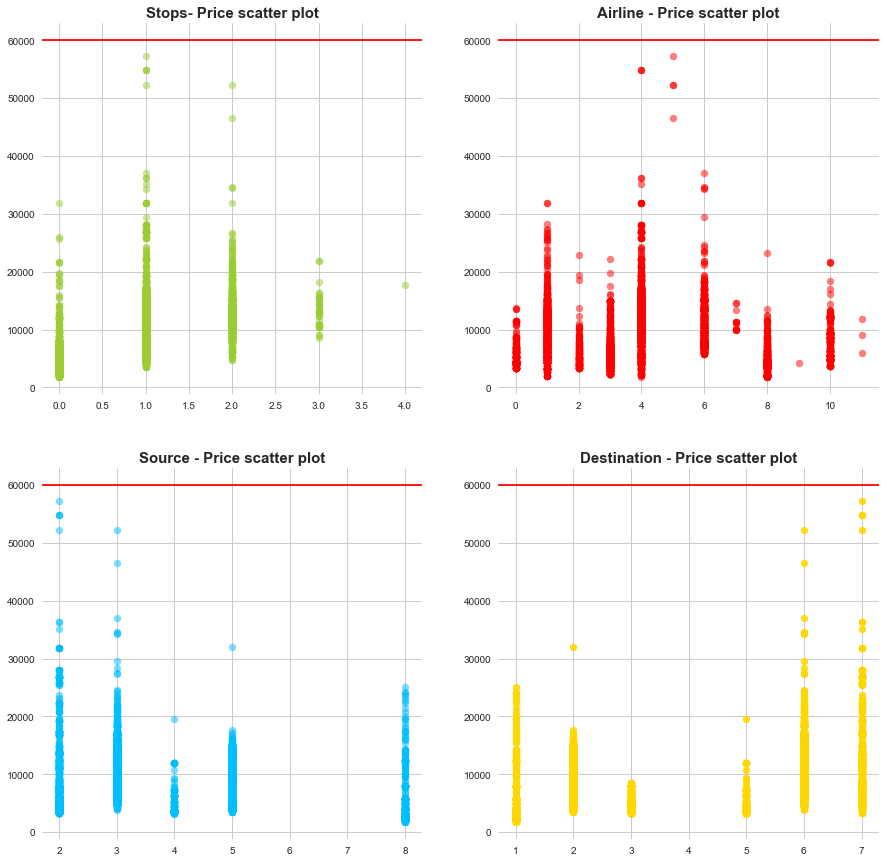

In [353]:
#verfiy if there is still anomly after drop
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((2,2),(0,0))
plt.scatter(x=Train['Stops'], y=Train['Price'], color=('yellowgreen'), alpha=0.5)
plt.axhline(y=60000, color='r', linestyle='-')
plt.title('Stops- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((2,2),(0,1))
plt.scatter(x=Train['Airline'], y=Train['Price'], color=('red'),alpha=0.5)
plt.axhline(y=60000, color='r', linestyle='-')
plt.title('Airline - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((2,2),(1,0))
plt.scatter(x=Train['Source'], y=Train['Price'], color=('deepskyblue'),alpha=0.5)
plt.axhline(y=60000, color='r', linestyle='-')
plt.title('Source - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((2,2),(1,1))
plt.scatter(x=Train['Destination'], y=Train['Price'], color=('gold'),alpha=0.9)
plt.axhline(y=60000, color='r', linestyle='-')
plt.title('Destination - Price scatter plot', fontsize=15, weight='bold' )

plt.show()

Perform log tranformation to have uniformed Price range. Observe that other features do not have skewness.

In [354]:
print(f"Skewness after log transform: {Train['Price'].skew()}")
print(f"Kurtosis after log transform: {Train['Price'].kurt()}")

Skewness after log transform: 1.41351376890318
Kurtosis after log transform: 7.2341285941712155


In [355]:
Train["Price"] = np.log1p(Train["Price"])

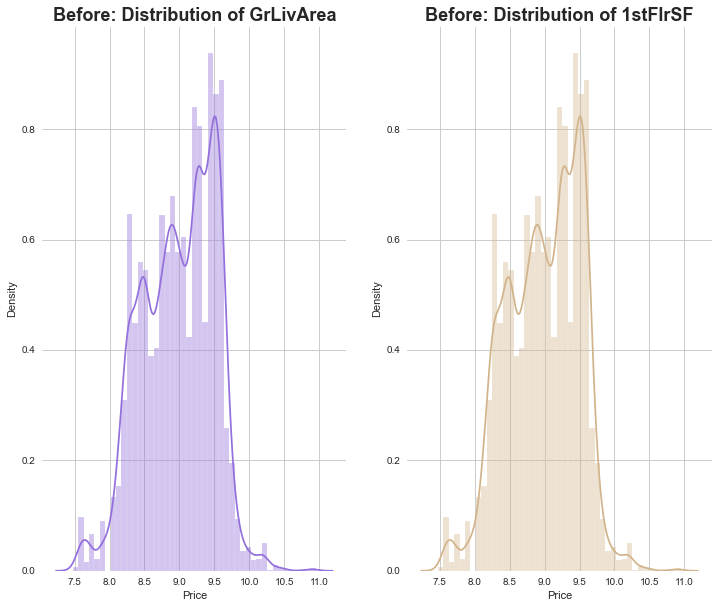

In [356]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(12,10))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(Train['Price'], color='mediumpurple')
plt.title('Before: Distribution of GrLivArea',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(Train['Price'], color='tan')
plt.title('Before: Distribution of 1stFlrSF',weight='bold', fontsize=18)

plt.show()

In [357]:
print(f"Skewness after log transform: {Train['Price'].skew()}")
print(f"Kurtosis after log transform: {Train['Price'].kurt()}")

Skewness after log transform: -0.2678499454552922
Kurtosis after log transform: -0.4476389119338968


# 4. Model Building and Tuning

In [358]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [286]:
x = Train.drop(['Price'], axis=1)
y = np.array(Train['Price'])

In [287]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .3, random_state=0)

In [288]:
Test.drop(['Price'], axis=1, inplace=True)

In [289]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
# transform "x_train"
x_train = scaler.fit_transform(x_train)
# transform "x_test"
x_test = scaler.transform(x_test)
#Transform the test set
X_test= scaler.transform(Test)

### Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression

lreg=LinearRegression()
MSEs = ms.cross_val_score(lreg, x, y, scoring='neg_mean_squared_error', cv=5)
meanMSE=np.mean(MSEs)
print(meanMSE)
print('RMSE = '+str(math.sqrt(-meanMSE)))

-0.1136153289409401
RMSE = 0.33706873029241396


In [79]:
def score(y_test, y_pred):
    return str(math.sqrt(sklm.mean_squared_error(y_test, y_pred)))

### Ridge

In [80]:
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg = ms.GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(x_train,y_train)
print(f"The best value of Alpha is: {ridge_reg.best_params_}")
print(f"The best score achieved with Alpha=11 is: {math.sqrt(-ridge_reg.best_score_)}")
ridge_pred=math.sqrt(-ridge_reg.best_score_)

The best value of Alpha is: {'alpha': 6}
The best score achieved with Alpha=11 is: 0.33345416951111767


In [82]:
ridge_mod=Ridge(alpha=6)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(x_train)
y_pred_test=ridge_mod.predict(x_test)

print(f'Root Mean Square Error train =  {str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train)))}')
print(f'Root Mean Square Error test =  {score(y_test, y_pred_test)}')   

Root Mean Square Error train =  0.33251331541397766
Root Mean Square Error test =  0.34544054591759776


In [84]:
#Ridge regression with cross validation

Ridge_CV=Ridge(alpha=6)
MSEs=ms.cross_val_score(Ridge_CV, x, y, scoring='neg_mean_squared_error', cv=5)

#RMSE score of the 5 folds
print("RMSE scores of the 5 folds:")
for i,j in enumerate(MSEs):
    j= math.sqrt(np.mean(-j))
    print(f'Fold {i}: {round(j,4)}')

#Final RMSE score with Rideg
print(f'Mean RMSE with Ridge: {round(math.sqrt(np.mean(-MSEs)),4)}')

RMSE scores of the 5 folds:
Fold 0: 0.3436
Fold 1: 0.3272
Fold 2: 0.3366
Fold 3: 0.3372
Fold 4: 0.3405
Mean RMSE with Ridge: 0.3371


### Lasso Regression

In [85]:
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}

lasso=Lasso()
lasso_reg = ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(x_train,y_train)

print(f'The best value of Alpha is: {lasso_reg.best_params_}')

The best value of Alpha is: {'alpha': 0.0001}


In [87]:
lasso_mod=Lasso(alpha=0.0001)
lasso_mod.fit(x_train,y_train)
y_lasso_train=lasso_mod.predict(x_train)
y_lasso_test=lasso_mod.predict(x_test)

print(f'Root Mean Square Error train  {str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train)))}')
print(f'Root Mean Square Error test  {score(y_test, y_lasso_test)}')

Root Mean Square Error train  0.3325111112510232
Root Mean Square Error test  0.34541796938616137


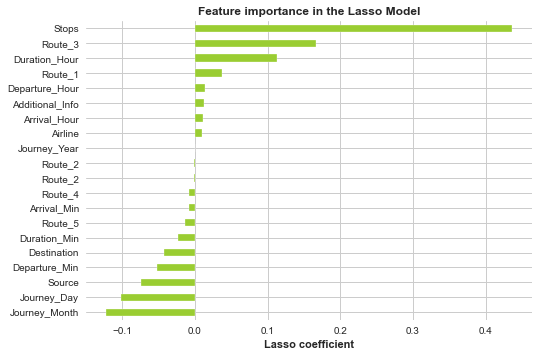

In [88]:
coefs = pd.Series(lasso_mod.coef_, index = x.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='green')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

In [90]:
print(f"Lasso kept {sum(coefs != 0)} important features and dropped the other  {sum(coefs == 0)} features")

Lasso kept 18 important features and dropped the other  1 features


In [92]:
#Lasso regression
Lasso_CV = Lasso(alpha=0.0001)
Lasso_MSEs = ms.cross_val_score(Lasso_CV, x, y, scoring='neg_mean_squared_error', cv=5)

#RMSE score of the 5 folds
print("RMSE scores of the 5 folds:")
for i,j in enumerate(Lasso_MSEs):
    j= math.sqrt(np.mean(-j))
    print(f'Fold {i}: {round(j,4)}')

#Final RMSE score with Lasso
print(f'Mean RMSE with Lasso: {round(math.sqrt(np.mean(-Lasso_MSEs)),4)}')

RMSE scores of the 5 folds:
Fold 0: 0.3436
Fold 1: 0.3272
Fold 2: 0.3366
Fold 3: 0.3372
Fold 4: 0.3405
Mean RMSE with Lasso: 0.3371


### Elastic Net

In [93]:
from sklearn.linear_model import ElasticNetCV

alphas = [10,1,0.1,0.01,0.001,0.002,0.003,0.004,0.005,0.00054255]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())
ela_pred=elasticmod.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, ela_pred))))
print(elastic_cv.alpha_)

Root Mean Square Error test = 0.34544296924911927
0.001


In [95]:
from sklearn.linear_model import ElasticNetCV

alphas = [0.001]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())
ela_pred=elasticmod.predict(x_test)
print(f'Root Mean Square Error test = {score(y_test, ela_pred)}')
print(elastic_cv.alpha_)
print(elastic_cv.l1_ratio_)

Root Mean Square Error test = 0.34544296924911927
0.001
0.1


### XGBoost

In [109]:
from xgboost.sklearn import XGBRegressor
import xgboost as xgb

xg_reg = xgb.XGBRegressor()

xgparam_grid= {'learning_rate' : [0.01],
               'n_estimators':[2000, 3460, 4000],
               'max_depth':[3], 'min_child_weight':[3,5],
               'colsample_bytree':[0.5,0.7],
               'reg_alpha':[0.0001,0.001,0.01,0.1,10,100],
               'reg_lambda':[1,0.01,0.8,0.001,0.0001]}

xg_grid = ms.GridSearchCV(xg_reg, param_grid=xgparam_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

xg_grid.fit(x_train,y_train)
print(xg_grid.best_estimator_)
print(xg_grid.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=4000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0.001, reg_lambda=0.0001, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)
-0.022028702937619472


In [110]:
xgb= xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=3, missing=None, n_estimators=4000,
             n_jobs=0, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0.001, reg_lambda=0.0001, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=None)

xgmod=xgb.fit(x_train,y_train)
xg_pred=xgmod.predict(x_test)
print(f'Root Mean Square Error test = {score(y_test, xg_pred)}')

Root Mean Square Error test = 0.16190825879505322


### Voting Regressor

In [111]:
from sklearn.ensemble import VotingRegressor

vote_mod = VotingRegressor([('Ridge', ridge_mod), ('Lasso', lasso_mod), ('Elastic', elastic_cv), 
                            ('XGBRegressor', xgb)])
vote= vote_mod.fit(x_train, y_train.ravel())
vote_pred=vote.predict(x_test)

print(f'Root Mean Square Error test = {score(y_test, vote_pred)}')

Root Mean Square Error test = 0.2851734486214076


### Stacking Regressor

In [115]:
from mlxtend.regressor import StackingRegressor


stregr = StackingRegressor(regressors=[elastic_cv,ridge_mod, lasso_mod, vote_mod], 
                           meta_regressor=xgb, use_features_in_secondary=True)

stack_mod=stregr.fit(x_train, y_train.ravel())
stacking_pred=stack_mod.predict(x_test)

print(f'Root Mean Square Error test = {score(y_test, stacking_pred)}')

Root Mean Square Error test = 0.15646108950451157


### Averaging Regressor

In [117]:
final_test=(0.3*vote_pred+0.5*stacking_pred+ 0.2*y_lasso_test)
print(f'Root Mean Square Error test=  {score(y_test, final_test)}')

Root Mean Square Error test=  0.21133133911128615


### Random Forest

In [130]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 5000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


# Create the random grid
'''
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)
'''
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features
               }

In [136]:
rf = RandomForestRegressor(n_estimators=4000)

In [137]:
randomforest_mod = rf.fit(x_train, y_train.ravel())
randomforest_pred = rf.predict(x_test)                    
print(f'Root Mean Square Error test = {score(y_test, randomforest_pred)}')

Root Mean Square Error test = 0.1404431404665752


In [140]:
rf_cv = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                               scoring='neg_mean_squared_error', n_iter = 20, cv = 3, 
                               verbose=2, random_state=42, n_jobs = 1)

rf_cv.fit(x_train,y_train)
print(rf_cv.best_estimator_)
print(rf_cv.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=1000, max_features=auto ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. n_estimators=1000, max_features=auto, total=  12.7s
[CV] n_estimators=1000, max_features=auto ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.6s remaining:    0.0s


[CV] ............. n_estimators=1000, max_features=auto, total=  12.9s
[CV] n_estimators=1000, max_features=auto ............................
[CV] ............. n_estimators=1000, max_features=auto, total=  13.0s
[CV] n_estimators=1444, max_features=auto ............................
[CV] ............. n_estimators=1444, max_features=auto, total=  18.8s
[CV] n_estimators=1444, max_features=auto ............................
[CV] ............. n_estimators=1444, max_features=auto, total=  18.8s
[CV] n_estimators=1444, max_features=auto ............................
[CV] ............. n_estimators=1444, max_features=auto, total=  18.6s
[CV] n_estimators=1888, max_features=auto ............................
[CV] ............. n_estimators=1888, max_features=auto, total=  24.6s
[CV] n_estimators=1888, max_features=auto ............................
[CV] ............. n_estimators=1888, max_features=auto, total=  24.9s
[CV] n_estimators=1888, max_features=auto ............................
[CV] .

[CV] ............. n_estimators=5000, max_features=sqrt, total=  31.5s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 29.8min finished


RandomForestRegressor(n_estimators=5000)
-0.01808858410362547


In [141]:
#randomforest_cv = rf_cv.fit(x_train, y_train.ravel())
randomforest_cv_pred = rf_cv.predict(x_test)                    
print(f'Root Mean Square Error test = {score(y_test, randomforest_cv_pred)}')

Root Mean Square Error test = 0.14053832109084843


# 5. Predict on Final Test Data

In [142]:
#VotingRegressor to predict the final Test
vote_test = vote_mod.predict(X_test)
final1 = np.expm1(vote_test)

#StackingRegressor to predict the final Test
stack_test = stregr.predict(X_test)
final2 = np.expm1(stack_test)

#LassoRegressor to predict the final Test
lasso_test = lasso_mod.predict(X_test)
final3 = np.expm1(lasso_test)

#LassoRegressor to predict the final Test
lasso_test = lasso_mod.predict(X_test)
final3 = np.expm1(lasso_test)

#XGBoost to predict the final test
xgmod_test = xgmod.predict(X_test)
final4 = np.expm1(xgmod_test)

#Random Forest to predict the final test
rf_test = rf_cv.predict(X_test)
final5 = np.expm1(xgmod_test)

In [121]:
#Submission of the results predicted by the average of Voting/Stacking/Lasso
final=(0.2*final1+0.6*final2+0.2*final3)

In [143]:
final_submission = pd.DataFrame({
       "Price": final5
    })
final_submission.to_csv("final_submission_with_rfcv.csv", index=False)
final_submission.head()

,Price
0,13818.625000
1,4636.310059
2,11033.496094
3,10440.623047
4,3867.477539


# 6. Export model

In [144]:
import pickle 

In [149]:
#xgboost model picklet
pickle.dump(xgmod, open('model_xgboost.pkl', 'wb'))

In [150]:
#randomforest model picklet
pickle.dump(rf_cv, open('model_randomforest.pkl', 'wb'))

In [151]:
#voting regressor model picklet
pickle.dump(vote_mod, open('model_votinging_regressor.pkl', 'wb'))

In [152]:
#stacking regressor model picklet
pickle.dump(stack_mod, open('model_stacking_regressor.pkl', 'wb'))